In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [6]:
x = 0.5
y = 0.3
t = torch.tensor(x**2 + y**2 < 1)

In [8]:
t.int()

tensor(1, dtype=torch.int32)

In [9]:
def f(x, y):
    return (x**2 + y**2 < 1).int()
    

In [10]:
uniform = torch.distributions.Uniform(low= 0., high=1.)

tensor(79)

In [52]:
def estimate(N, plot=False):
    XY = uniform.sample([N, 2])
    X = XY[:, 0]
    Y = XY[:, 1]
    pi_hat =(4*f(X, Y).sum()/len(X)).item()
    
    if plot:

        plt.scatter(X, Y, c='k', alpha=0.5, s = 20)
        plt.xlim((0, 1))
        plt.ylim(0, 1)
        ax = plt.gca()
        ax.set_aspect("equal")

        c = plt.Circle((0, 0), 1, alpha=0.5,zorder=-10)
        ax.add_artist(c)
        plt.title(rf"$\hat{{\pi}}$ = {pi_hat:0.4f}")
    return pi_hat

3.2799999713897705

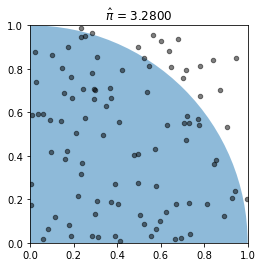

In [53]:
estimate(100, True)

In [94]:
num_experiments = 1000
out = {}

for N in torch.pow(10, torch.arange(0, 7, 1)):
    N_val = N.item()
    out[N_val] = {}
    for experiment in range(num_experiments):
        out[N_val][experiment] = estimate(N_val, False)
    



In [97]:
df = pd.DataFrame(out)

In [98]:
df

,1,10,100,1000,10000,100000,1000000
0,4.0,3.6,3.04,3.108,3.1244,3.14032,3.143236
1,4.0,3.2,3.24,3.100,3.1228,3.14880,3.140112
2,4.0,2.0,3.40,3.272,3.1484,3.13720,3.143680
3,4.0,3.2,3.24,3.112,3.1580,3.14680,3.142780
4,4.0,3.2,2.92,3.120,3.1264,3.14328,3.141992
...,...,...,...,...,...,...,...
995,4.0,3.6,3.16,3.128,3.1060,3.14612,3.141348
996,4.0,2.4,3.28,3.212,3.1356,3.14076,3.141380
997,4.0,3.6,2.96,3.164,3.1856,3.14856,3.141468
998,4.0,3.2,3.00,3.156,3.1504,3.14180,3.137832


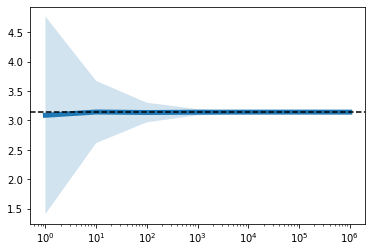

In [99]:
mean_df = df.mean()
mean_df.plot(logx=True, lw=5)
std_df = df.std()
plt.fill_between(mean_df.index, mean_df-std_df, mean_df+std_df, alpha=0.2)
plt.axhline(torch.pi, color='k', linestyle='--')

<AxesSubplot:>

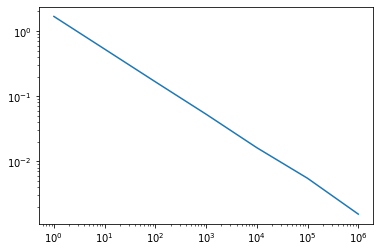

In [101]:
std_df.plot(logx=True, logy=True)